In [1]:
# Prepare the data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from caas_jupyter_tools import display_dataframe_to_user

labels = ["4 nodes (160 cores)", "3 nodes (120 cores)", "2 nodes (80 cores)", "1 node (40 cores)"]
runtime = [100.0, 112.0, 146.0, 238.0]
scf = [53.4, 63.2, 90.4, 158.7]   # first Task times
dft = [24.7, 30.2, 42.4, 72.7]    # second Task times

df = pd.DataFrame({
    "Config": labels,
    "Runtime (s)": runtime,
    "SCF task (s)": scf,
    "DFT task (s)": dft
})

# Show a quick table to verify values
display_dataframe_to_user("NWChem Baseline Times", df)

# Plot: grouped bars per configuration (Runtime, SCF, DFT)
x = np.arange(len(labels))
width = 0.25

fig = plt.figure()
ax = plt.gca()

b1 = ax.bar(x - width, runtime, width, label="Runtime (wall)")
b2 = ax.bar(x, scf, width, label="SCF task")
b3 = ax.bar(x + width, dft, width, label="DFT task")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right")
ax.set_ylabel("Seconds")
ax.set_title("NWChem Baseline: Runtime vs. SCF/DFT Task Times")

ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.legend(loc="upper left")

# Add value labels
def add_labels(bars):
    try:
        ax.bar_label(bars, padding=3, fmt="%.1f")
    except Exception:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., 1.01*height, f"{height:.1f}", ha='center', va='bottom')

add_labels(b1)
add_labels(b2)
add_labels(b3)

fig.tight_layout()

# png_path = "/mnt/data/nwchem_baseline_bars.png"
# pdf_path = "/mnt/data/nwchem_baseline_bars.pdf"
# plt.savefig(png_path, bbox_inches="tight", dpi=220)
# plt.savefig(pdf_path, bbox_inches="tight")
plt.show()

# png_path, pdf_path


ModuleNotFoundError: No module named 'matplotlib'

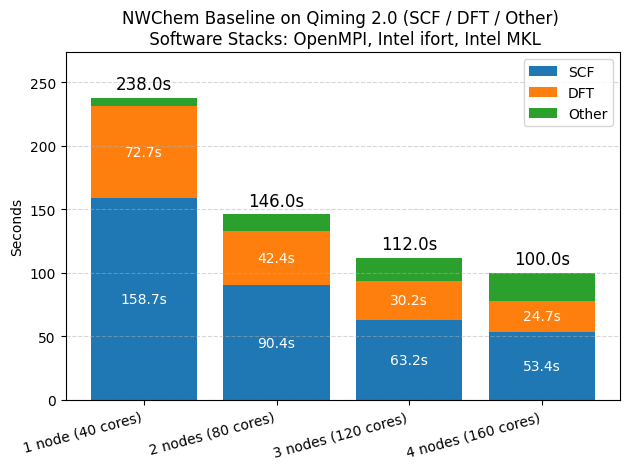

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from caas_jupyter_tools import display_dataframe_to_user

# Data
labels = ["4 nodes (160 cores)", "3 nodes (120 cores)", "2 nodes (80 cores)", "1 node (40 cores)"]
# reverse
labels = list(reversed(labels))

runtime = np.array([100.0, 112.0, 146.0, 238.0])
# sort from high to low
runtime = np.array(sorted(runtime, reverse=True))

scf = np.array([53.4, 63.2, 90.4, 158.7])
scf = np.array(sorted(scf, reverse=True))
dft = np.array([24.7, 30.2, 42.4, 72.7])
dft = np.array(sorted(dft, reverse=True))

# Compute "Other" as the remaining part of runtime
other = runtime - (scf + dft)
# Guard against negative due to rounding
other = np.where(other < 0, 0.0, other)

# Prepare table
df = pd.DataFrame({
    "Config": labels,
    "Runtime (s)": runtime,
    "SCF (s)": scf,
    "DFT (s)": dft,
    "Other (s)": other,
    "SCF %": np.round(100*scf/runtime, 1),
    "DFT %": np.round(100*dft/runtime, 1),
    "Other %": np.round(100*other/runtime, 1),
})
# display_dataframe_to_user("NWChem Stacked Runtime Breakdown", df)

# list from high to low
# df = df.sort_values(by="Runtime (s)", ascending=False)

# Plot stacked bars: total equals Runtime, segments = SCF + DFT + Other
x = np.arange(len(labels))

fig = plt.figure()
ax = plt.gca()

p1 = ax.bar(x, scf, label="SCF")
p2 = ax.bar(x, dft, bottom=scf, label="DFT")
p3 = ax.bar(x, other, bottom=scf+dft, label="Other")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right")
ax.set_ylabel("Seconds")
ax.set_title("NWChem Baseline on Qiming 2.0 (SCF / DFT / Other) \n Software Stacks: OpenMPI -- Intel ifort -- Intel MKL")
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.legend(loc="upper right")

# y axis
ax.set_ylim(0, max(runtime)*1.15)

# Annotate total runtime at the top of each bar
for i, total in enumerate(runtime):
    ax.text(i, total + max(runtime)*0.015, f"{total:.1f}s", ha="center", va="bottom", fontsize=12)
    # annotate scf and dft runtime
    ax.text(i, scf[i]/2, f"{scf[i]:.1f}s", ha="center", va="center", color="white", fontsize=10)
    ax.text(i, scf[i] + dft[i]/2, f"{dft[i]:.1f}s", ha="center", va="center", color="white", fontsize=10)

fig.tight_layout()

# png_path = "/mnt/data/nwchem_baseline_stacked.png"
# pdf_path = "/mnt/data/nwchem_baseline_stacked.pdf"
# plt.savefig(png_path, bbox_inches="tight", dpi=220)
# plt.savefig(pdf_path, bbox_inches="tight")
plt.show()

# png_path, pdf_path
